## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_df = pd.merge(mouse_metadata, study_results, how="left", on = "Mouse ID")
# Display the data table for preview
complete_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(complete_df["Mouse ID"].unique())


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
complete_df.loc[complete_df.duplicated(), ["Mouse ID","Timepoint"]]


,Mouse ID,Timepoint
909,g989,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
complete_df.loc[complete_df.duplicated(), :]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
complete_df.drop_duplicates()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(complete_df["Mouse ID"].unique())


249

## Summary Statistics

### Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen



In [7]:
# This method is the most straighforward, creating multiple series and putting them all together at the end.

# group the complete table by different drug regimen
grouped_df = complete_df.groupby("Drug Regimen")
# calculate mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
means = grouped_df["Tumor Volume (mm3)"].mean()
medians = grouped_df["Tumor Volume (mm3)"].median()
variances = grouped_df["Tumor Volume (mm3)"].var()
sds = grouped_df["Tumor Volume (mm3)"].std()
sems = grouped_df["Tumor Volume (mm3)"].sem()
# put them into one dataframe and name each column
summary_df = pd.DataFrame({
    "Mean":means, 
    "Median":medians, 
    "Variance":variances,
    "Standard Deviation":sds,
    "SEM":sems
})
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


### Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


In [8]:
# This method produces everything in a single groupby function
# use the groupedby dataframe and get describtive statistic

summary_df2 = complete_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","std","var","sem"]})
summary_df2

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.322552  50.854632  6.507770  42.351070  0.512884
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar and Pie Charts

### Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 


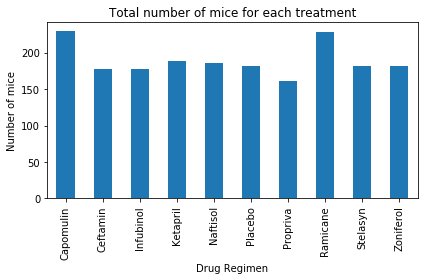

In [9]:
# count number of mice for each drug regimen
mice_count = grouped_df["Mouse ID"].count()
# plot a bar plot with pandas
mice_count.plot(kind = "bar")
# set title and labels
plt.title("Total number of mice for each treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")
# save graph 
plt.tight_layout()
plt.savefig("Images/mice_per_treatment_pandas.png")
# print plot
plt.show()

### Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

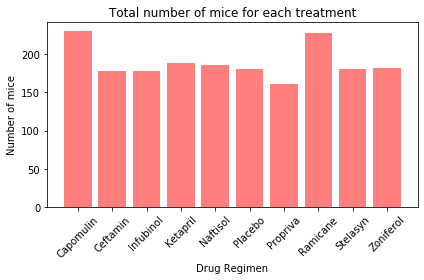

In [10]:
# calculate mice count under each treatment and set the length of x axis
mice_counts2 = grouped_df["Mouse ID"].count()
x_axis = np.arange(len(mice_counts2))
# tell matplotlib we are going to make a bar chart
plt.bar(x_axis, mice_counts2, color = "red", alpha = 0.5, align = "center")
# place headers for each of the x axis
tick_locations = [value for value in x_axis]
headers = grouped_df.groups.keys()
plt.xticks(tick_locations, headers, rotation=45)
# set title and labels
plt.title("Total number of mice for each treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")
# save graph 
plt.tight_layout()
plt.savefig("Images/mice_per_treatment_pyplot.png")
# print plot
plt.show()

### Generate a pie plot showing the distribution of female versus male mice using pandas

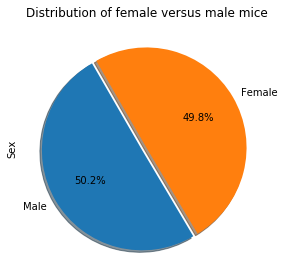

In [11]:
# count number of mice under each sex
sex_count = mouse_metadata["Sex"].value_counts()
# use pandas to plot a pie chart
explode = (0.05, 0)
sex_count.plot(kind="pie", explode=explode, autopct="%1.1f%%", shadow=True, startangle=120)
# set title and labels
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
# save graph 
plt.tight_layout()
plt.savefig("Images/mice_by_sex_pandas.png")
# print plot
plt.show()

### Generate a pie plot showing the distribution of female versus male mice using pyplot

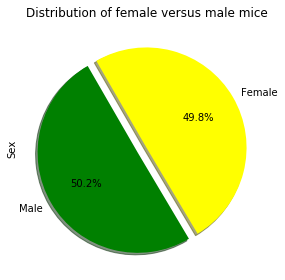

In [12]:
# count number of mice under each sex
sex_count = mouse_metadata["Sex"].value_counts()
# set each features for a pie chart
labels = sex_count.index.values
values = sex_count.values
colors = ["green","yellow"]
explode = (0.1, 0)
# plot a pie chart
plt.pie(values, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)
# set title and labels
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
# save graph 
plt.tight_layout()
plt.savefig("Images/mice_by_sex_pyplot.png")
# print plot
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = complete_df.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = max_tumor.merge(complete_df, on=["Mouse ID","Timepoint"], how="left")
merged_data


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vols = []

    # Locate the rows which contain mice on each drug and get the tumor volumes

for treatment in treatments_list: 
    tumor_vols.append(merged_data.loc[merged_data["Drug Regimen"]==treatment]["Tumor Volume (mm3)"]) 
    
    # Calculate IQR and Determine outliers using upper and lower bounds for each treatment 
    tumor_list = merged_data.loc[merged_data["Drug Regimen"]==treatment]["Tumor Volume (mm3)"]
    quartiles = tumor_list.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"The median of Tumor Volume (mm3) for treatment {treatment} is: {quartiles[0.5]}")
    print(f"The interquartile range of Tumor Volume (mm3) for treatment {treatment} is: {iqr}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {round(lower_bound, 5)} and above {round(upper_bound, 5)} could be outliers for treatment {treatment}.\n")
    

The median of Tumor Volume (mm3) for treatment Capomulin is: 38.125164399999996
The interquartile range of Tumor Volume (mm3) for treatment Capomulin is: 7.781863460000004
Values below 20.70456 and above 51.83202 could be outliers for treatment Capomulin.

The median of Tumor Volume (mm3) for treatment Ramicane is: 36.56165229
The interquartile range of Tumor Volume (mm3) for treatment Ramicane is: 9.098536719999998
Values below 17.91266 and above 54.30681 could be outliers for treatment Ramicane.

The median of Tumor Volume (mm3) for treatment Infubinol is: 60.16518046
The interquartile range of Tumor Volume (mm3) for treatment Infubinol is: 11.477135160000003
Values below 36.8329 and above 82.74145 could be outliers for treatment Infubinol.

The median of Tumor Volume (mm3) for treatment Ceftamin is: 59.85195552
The interquartile range of Tumor Volume (mm3) for treatment Ceftamin is: 15.577752179999997
Values below 25.35545 and above 87.66646 could be outliers for treatment Ceftamin.

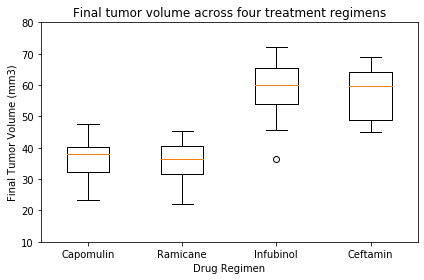

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final tumor volume across four treatment regimens")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
plt.ylim(10, 80)
ax1.boxplot(tumor_vols, labels=treatments_list)
# save graph 
plt.tight_layout()
plt.savefig("Images/boxplot.png")
# print plot
plt.show()

## Line and Scatter Plots

### Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

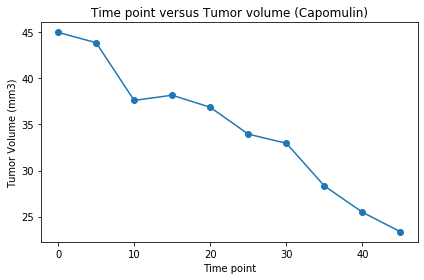

In [16]:
# Capture a mouse ID with Capomulin
mouse_cap = complete_df.loc[complete_df["Drug Regimen"]=="Capomulin"].reset_index()
mouse_cap_one = mouse_cap["Mouse ID"][0]

# set x_axis and y_axis
time_point_x = complete_df.loc[complete_df["Mouse ID"]==mouse_cap_one]["Timepoint"]
tumor_volume_y = complete_df.loc[complete_df["Mouse ID"]==mouse_cap_one]["Tumor Volume (mm3)"]

# create plot
plt.plot(time_point_x, tumor_volume_y, marker="o")
# set title and labels
plt.title("Time point versus Tumor volume (Capomulin)")
plt.xlabel("Time point")
plt.ylabel("Tumor Volume (mm3)")
# save graph 
plt.tight_layout()
plt.savefig("Images/time_versus_tumor_vol.png")
# print plot
plt.show()


### Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

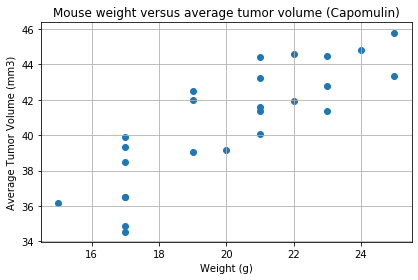

In [17]:
# Capture all mouse being treated with Capomulin
mouse_cap = complete_df.loc[complete_df["Drug Regimen"]=="Capomulin"].reset_index()
# only need Mouse ID, Weight, and Tumor Volume columns for this part 
scatter_mouse = mouse_cap[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
# group by weight and Mouse ID
scatter_grouped = scatter_mouse.groupby(["Mouse ID", "Weight (g)"])
# calculate average tumor volume
scatter_df = scatter_grouped["Tumor Volume (mm3)"].mean().to_frame()
scatter_df = scatter_df.reset_index()
# create a scatter plot of the scatter_df
plt.scatter(scatter_df["Weight (g)"], scatter_df["Tumor Volume (mm3)"], marker="o")
plt.grid(True)
# set title and labels
plt.title("Mouse weight versus average tumor volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
# save graph 
plt.tight_layout()
plt.savefig("Images/weight_versus_tumor.png")
# print plot
plt.show()

## Correlation and Regression

### Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

In [18]:
# compute pearson correlation coefficient
weight = scatter_df["Weight (g)"]
tumor_average = scatter_df["Tumor Volume (mm3)"]
correlation = st.pearsonr(weight,tumor_average)
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


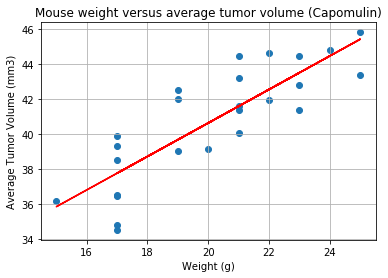

The linear regression equation is y = 0.95x + 21.55.



In [19]:
# compute the linear regression equation and add regression line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight,tumor_average)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weight,tumor_average)
plt.plot(weight,regress_values,"r-")
plt.grid(True)

plt.title("Mouse weight versus average tumor volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.savefig("Images/regression.png")
plt.show() 

print(f"The linear regression equation is {line_eq}.\n") 

